In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# Visualization 
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


# Taks .. Basic binary classification

In [2]:
# Load the data
tweets_df = pd.read_csv('all_data.csv')
tweets_df.shape

(156407, 3)

In [3]:
tweets_df.head()


,Unnamed: 0,text,sentiment
0,0,﻿حقا\n,pos
1,1,صح جدا\n,pos
2,2,﻿اه و النعمة \n,pos
3,3,كلامك جميل ورائع\n,pos
4,4,﻿و خير الكلام ما قل و دل\n,pos


In [4]:
tweets_df.info()
# we didn't have any missed Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156407 entries, 0 to 156406
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  156407 non-null  int64 
 1   text        156407 non-null  object
 2   sentiment   156407 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.6+ MB


In [5]:
tweets_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,156407.0,76237.344652,45108.14796,0.0,37110.5,76212.0,115313.5,154415.0


In [6]:
tweets_df['text']

0                                                    ﻿حقا\n
1                                                  صح جدا\n
2                                           ﻿اه و النعمة \n
3                                        كلامك جميل ورائع\n
4                                ﻿و خير الكلام ما قل و دل\n
                                ...                        
156402                      مع الاسف 😔 هاردلكم قبل الزحمه\n
156403            بصييحح الكلام ايجابي بشكل 💓 💓 💓 💓 💓 💓 😔\n
156404                           يارب يوم حلو وخفيف 😔 💙 💔\n
156405                            فخم والله يستااهل 😔 ♥ ♥\n
156406    اللهم اشفي اختي فانت اعلم بحالها 🙏 💔 اللهم رد ...
Name: text, Length: 156407, dtype: object

In [7]:
# drop id column
tweets_df = tweets_df.drop(['Unnamed: 0'],axis =1)

In [8]:
tweets_df # Already dropped column

,text,sentiment
0,﻿حقا\n,pos
1,صح جدا\n,pos
2,﻿اه و النعمة \n,pos
3,كلامك جميل ورائع\n,pos
4,﻿و خير الكلام ما قل و دل\n,pos
...,...,...
156402,مع الاسف 😔 هاردلكم قبل الزحمه\n,neg
156403,بصييحح الكلام ايجابي بشكل 💓 💓 💓 💓 💓 💓 😔\n,neg
156404,يارب يوم حلو وخفيف 😔 💙 💔\n,neg
156405,فخم والله يستااهل 😔 ♥ ♥\n,neg


In [9]:
# Checking Null
tweets_df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [10]:
tweets_df['sentiment'] = tweets_df.sentiment.replace(to_replace=['pos', 'neg'], value=[0, 1])

In [11]:
tweets_df # ... Great

,text,sentiment
0,﻿حقا\n,0
1,صح جدا\n,0
2,﻿اه و النعمة \n,0
3,كلامك جميل ورائع\n,0
4,﻿و خير الكلام ما قل و دل\n,0
...,...,...
156402,مع الاسف 😔 هاردلكم قبل الزحمه\n,1
156403,بصييحح الكلام ايجابي بشكل 💓 💓 💓 💓 💓 💓 😔\n,1
156404,يارب يوم حلو وخفيف 😔 💙 💔\n,1
156405,فخم والله يستااهل 😔 ♥ ♥\n,1


<AxesSubplot:xlabel='sentiment', ylabel='count'>

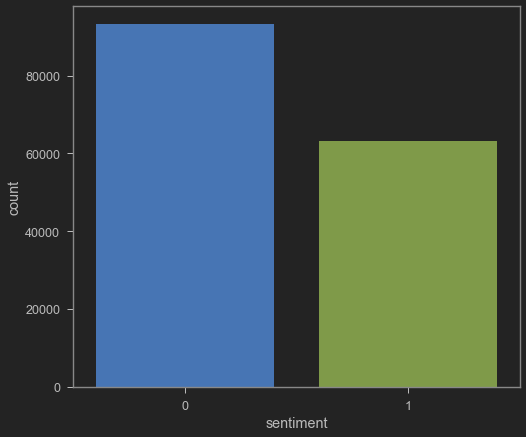

In [12]:
# distribution for labels 
sns.countplot(x = tweets_df['sentiment'], label = "count")

# 60% positive ... 40% negative

In [13]:
# Add length as a feature Column
tweets_df['length'] = tweets_df['text'].apply(len) # -apply function to all rows in this column 

In [14]:
tweets_df

,text,sentiment,length
0,﻿حقا\n,0,5
1,صح جدا\n,0,8
2,﻿اه و النعمة \n,0,14
3,كلامك جميل ورائع\n,0,17
4,﻿و خير الكلام ما قل و دل\n,0,25
...,...,...,...
156402,مع الاسف 😔 هاردلكم قبل الزحمه\n,1,30
156403,بصييحح الكلام ايجابي بشكل 💓 💓 💓 💓 💓 💓 😔\n,1,40
156404,يارب يوم حلو وخفيف 😔 💙 💔\n,1,25
156405,فخم والله يستااهل 😔 ♥ ♥\n,1,24


<AxesSubplot:ylabel='Frequency'>

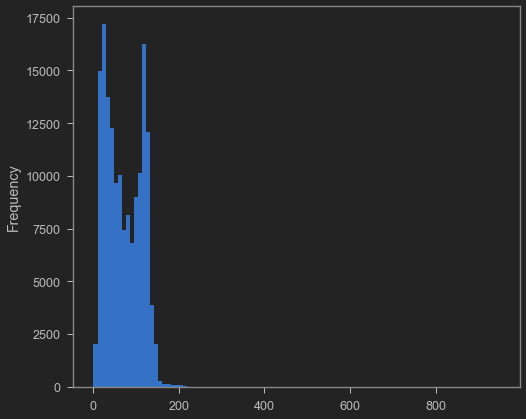

In [15]:
# see the distribution of length 
tweets_df['length'].plot(bins=100, kind='hist') 

# std of tweets between 20-200 characters  

In [16]:
tweets_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sentiment,156407.0,0.404477,0.490792,0.0,0.0,0.0,1.0,1.0
length,156407.0,71.097144,41.850822,1.0,33.0,66.0,111.0,949.0


In [17]:
# Explore data 
tweets_df[tweets_df['length'] == 66] # average sentence in the database 

,text,sentiment,length
83,﻿دعواتك لنا يا شيخ سلمان بالتوفيق و الفلاح و ا...,0,66
586,ماشاء الله عليكم بجد موضوع مهم جدا والاهم الرق...,0,66
900,اللهم ثبته على دين الاسلام اللهم يا مقلب القلو...,0,66
914,اهلا بيك فى دين الله ربنا يثبتك ويزيدك ايمانا ...,0,66
1391,شو عادي يزم انتا ما عندك دم ونخوه يزم انتا مش ...,1,66
...,...,...,...
155702,لازم الجدي يبقي رااشق لو مكنش هو يتخزق مين يعن...,1,66
155812,من غابت سيارة الفليت مال البلدية و الذباب فارد...,1,66
156035,والله مابتفرق بشوف بنات بيجو عالجامعة بستغرب ك...,1,66
156285,هذا بس اعرضه للناس وانا كذاب بس انتي الي بصرف ...,1,66


In [18]:
# Make positive data fram
positive = tweets_df[tweets_df['sentiment']==0]
positive

,text,sentiment,length
0,﻿حقا\n,0,5
1,صح جدا\n,0,8
2,﻿اه و النعمة \n,0,14
3,كلامك جميل ورائع\n,0,17
4,﻿و خير الكلام ما قل و دل\n,0,25
...,...,...,...
94130,اطلق صباح 😚 ♥ ️ ♥ ️ ♥ ️\n,0,24
94131,ي ايمااي 💙 💙 نورت تويتر يستا 😚 😂 ♥\n,0,35
94132,هتوحشيني 😚 😂 😂\n,0,15
94133,اللهم يحميكم وينصركم وتعودا لنا بالصحه والعافي...,0,138


In [19]:
# make negative data frame
negative = tweets_df[tweets_df['sentiment']==1]
negative

,text,sentiment,length
1000,﻿و الله حرام و الله موتوه لشعب الاردني من وين ...,1,126
1001,﻿البنزين يجي من السعوديه بأقل الاسعار و الحكوم...,1,64
1002,الله يوخذكم\n,1,12
1003,شو هاد البرنامج معقول عرضوه على القنوات!!!!!!...,1,54
1004,﻿للأسف البعض يعتقد ان المفاعل النووي سيحل مشاك...,1,389
...,...,...,...
156402,مع الاسف 😔 هاردلكم قبل الزحمه\n,1,30
156403,بصييحح الكلام ايجابي بشكل 💓 💓 💓 💓 💓 💓 😔\n,1,40
156404,يارب يوم حلو وخفيف 😔 💙 💔\n,1,25
156405,فخم والله يستااهل 😔 ♥ ♥\n,1,24


In [20]:
# Plot the World Cup
sentences = tweets_df['text'].tolist()
sentences

['\ufeffحقا\n',
 '\xa0صح جدا\n',
 '\ufeffاه و النعمة \n',
 'كلامك جميل ورائع\n',
 '\ufeffو خير الكلام ما قل و دل\n',
 '\ufeffولا تنسو تبسمك في وجه اخيك صدقه\n',
 '\ufeffليتنا نستطيع الابتسامه في الاوقات المؤلمه\n',
 '\ufeffو بحب الناس الرايقه الي بتضحك على طول\n',
 '\ufeffابتسم امام كل الناس لتسرهم و تجبر خواطرهم فتبسمك في وجوههم صدقه\n',
 '\ufeffو الله انت حبيبي \n',
 '\ufeffصح فالابتسامه تصنع السعاده\n',
 '\ufeffالابتسامه جميله\n',
 '\ufeffابتسم بنيه طيبه و فقط\n',
 '\xa0معك حق\n',
 'لطيف\n',
 'البسمه سر من اسرار الحياة\n',
 'كل سنه وانتم طيبين\n',
 '\ufeffأجمل ابتسامه\n',
 'الابتسامه كلمه طيبه بغير حروف\n',
 'أفعال لا تضاهيها أقوال\n',
 'أفعال لا تحتاج إلى أقوال\n',
 'الابتسامة كلمة بدون حروف\n',
 'صحيح الابتسامه لها تعابير كثيره\n',
 'اضحك تضحكلك الدني\n',
 '\xa0انا احب هذا الكاتب\n',
 '\ufeffابتسم و هدي اعصابك\n',
 '\ufeffكلام طيب\n',
 '\ufeffو خير الابتسامة \n',
 'روعة الاشياء تبقى روائحها بقى اصحابها ام انصرفوا\n',
 '\ufeffصدقتي رائعه و معبره الكلام\n',
 'هذه من أقوال الرفيق الم

In [21]:
sentences[0]

'\ufeffحقا\n'

In [22]:
len(sentences) # we have 156407 sentence 

156407

In [23]:
sentences_as_one_string = " ".join(sentences) 


In [51]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

wordcloud = WordCloud(font_path='arial.ttf')


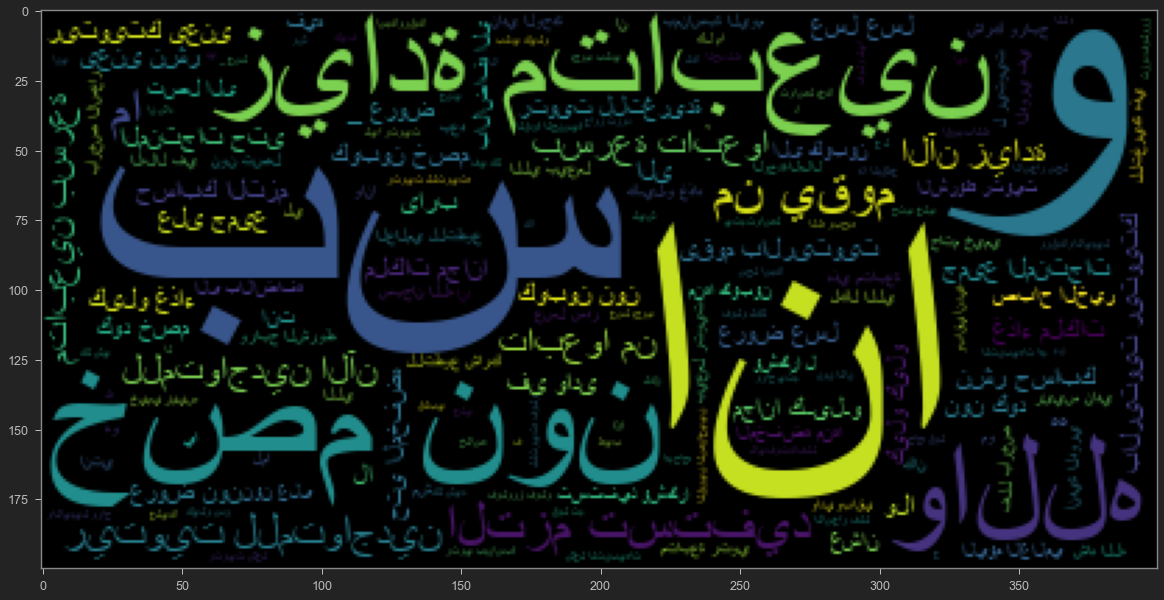

In [52]:
# Visual Representation for all text that we have 
plt.figure(figsize=(20,20))
plt.imshow(wordcloud.generate(sentences_as_one_string)) # positive and negative words 

In [57]:
pip install --upgrade arabic-reshaper

In [58]:
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [60]:
word_cloud = WordCloud(font_path='arial', stopwords=STOPWORDS, background_color="white", max_font_size=50, max_words=100)


In [66]:
text_to_be_reshaped = 'اللغة العربية رائعة'
reshaped_text = arabic_reshaper.reshape(text_to_be_reshaped)
reshaped_text

'ﺍﻟﻠﻐﺔ ﺍﻟﻌﺮﺑﻴﺔ ﺭﺍﺋﻌﺔ'

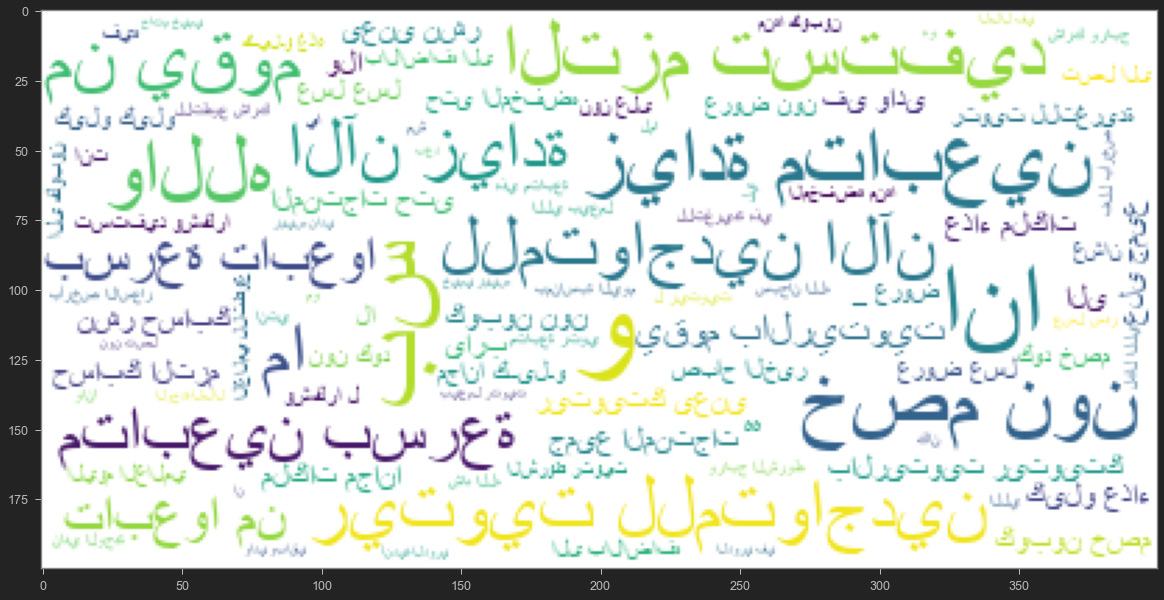

In [64]:
# Visual Representation for all text that we have 
plt.figure(figsize=(20,20))
word_cloud = word_cloud.generate(sentences_as_one_string)
plt.imshow(word_cloud)



In [29]:
negative_sentences = negative['text'].tolist()

negative_sentence_as_one_string = " ".join(negative_sentences)

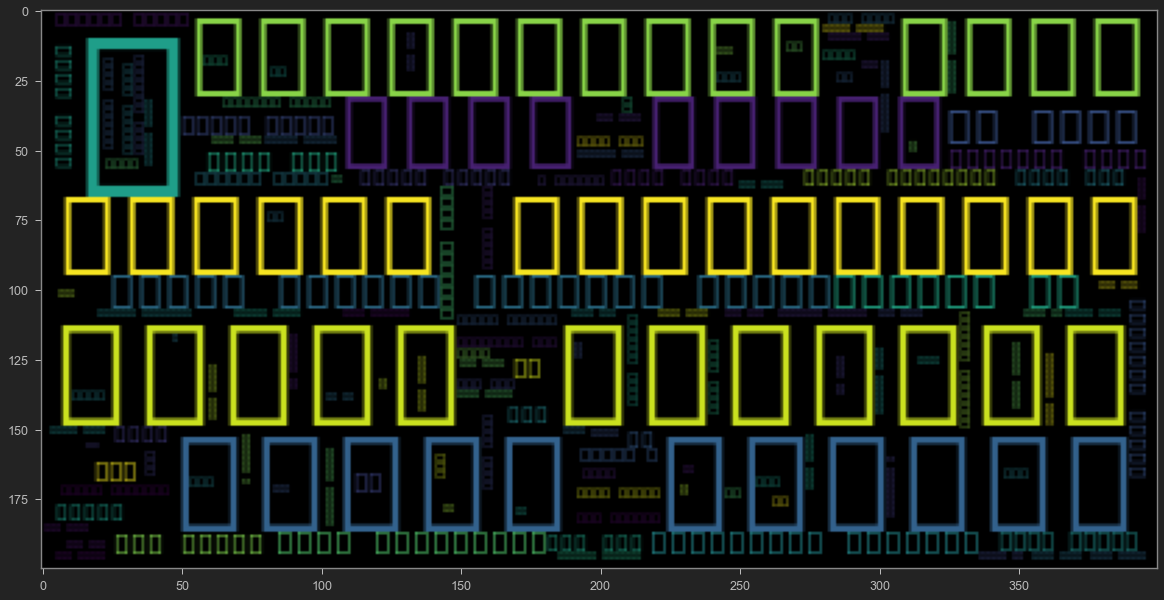

In [53]:
# Visualization for negative words 
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentence_as_one_string))